<a href="https://colab.research.google.com/github/GaneshK567/malaria-cell-recognition/blob/main/exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True 
config.log_device_placement = True 
sess = tf.compat.v1.Session(config=config)
set_session(sess)
%matplotlib inline

Device mapping: no known devices.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!tar --skip-old-files -xvf '/content/drive/MyDrive/Dataset/cell_images.tar.xz' -C '/content/drive/MyDrive/Dataset/'

Streaming output truncated to the last 5000 lines.
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_229.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_245.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_251.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_261.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_41.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_54.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_57.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_85.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_104.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_109.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_128.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_142.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_167.png
cell_images/train

In [47]:
my_data_dir = '/content/drive/MyDrive/Dataset/cell_images'

In [48]:
os.listdir(my_data_dir)

['test', 'train']

In [49]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [50]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [51]:
len(os.listdir(train_path+'/uninfected/'))

12479

In [52]:
len(os.listdir(train_path+'/parasitized/'))

12479

In [53]:
os.listdir(train_path+'/parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [54]:
para_img= imread(train_path+
                 '/parasitized/'+
                 os.listdir(train_path+'/parasitized')[0])

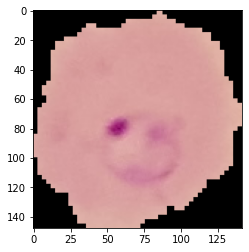

In [55]:
plt.imshow(para_img)

In [56]:
# Checking the image dimensions
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

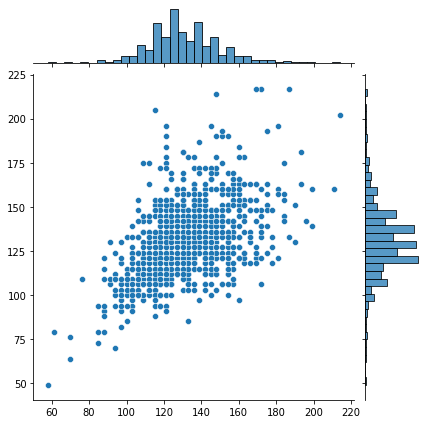

In [57]:
sns.jointplot(x=dim1,y=dim2)

In [58]:
image_shape = (130,130,3)

In [59]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [60]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [61]:
model = models.Sequential()
# Write your code here
model.add(layers.Input(shape=image_shape))
model.add(layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 130, 130, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 130, 130, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 65, 65, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 65, 65, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)      

In [63]:
batch_size = 16

In [64]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [65]:
train_image_gen.batch_size

16

In [66]:
len(train_image_gen.classes)

24958

In [67]:
train_image_gen.total_batches_seen

0

In [68]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [69]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [70]:
results = model.fit(train_image_gen,epochs=10,
                              validation_data=test_image_gen
                             )

Epoch 1/10
1560/1560 [==============================] - 1817s 1s/step - loss: 0.6778 - accuracy: 0.5607 - val_loss: 0.6792 - val_accuracy: 0.5842
Epoch 2/10
1560/1560 [==============================] - 1819s 1s/step - loss: 0.6489 - accuracy: 0.6203 - val_loss: 0.4692 - val_accuracy: 0.7965
Epoch 3/10
1560/1560 [==============================] - 1815s 1s/step - loss: 0.2338 - accuracy: 0.9215 - val_loss: 0.2061 - val_accuracy: 0.9258
Epoch 4/10
1560/1560 [==============================] - 1812s 1s/step - loss: 0.1824 - accuracy: 0.9419 - val_loss: 0.1738 - val_accuracy: 0.9435
Epoch 5/10
1560/1560 [==============================] - 1813s 1s/step - loss: 0.1699 - accuracy: 0.9477 - val_loss: 0.1684 - val_accuracy: 0.9446
Epoch 6/10
1560/1560 [==============================] - 1812s 1s/step - loss: 0.1630 - accuracy: 0.9493 - val_loss: 0.3342 - val_accuracy: 0.8212
Epoch 7/10
1560/1560 [==============================] - 1810s 1s/step - loss: 0.1560 - accuracy: 0.9508 - val_loss: 0.1907 -

In [71]:
model.save('cell_model.h5')

In [72]:
losses = pd.DataFrame(model.history.history)

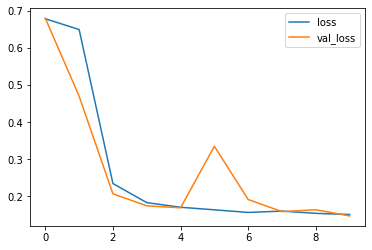

In [73]:
losses[['loss','val_loss']].plot()

In [74]:
model.metrics_names

['loss', 'accuracy']

In [75]:
model.evaluate(test_image_gen)

163/163 [==============================] - 54s 328ms/step - loss: 0.1497 - accuracy: 0.9504


[0.14972016215324402, 0.9503846168518066]

In [ ]:
pred_probabilities = model.predict(test_image_gen)

In [ ]:
test_image_gen.classes

In [ ]:
predictions = pred_probabilities > 0.5

In [1]:
print(classification_report(test_image_gen.classes,predictions))

NameError: ignored

In [80]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1232,   68],
       [  65, 1235]])

array([[1232,   68],
       [  65, 1235]])